In [ ]:
import pandas as pd
import numpy as np

data= pd.read_csv("telecom_data_churn.csv")

data.head(10)

,age,gender,contract_type,monthly_charges,churn
0,56,Male,Two year,106.899158,1
1,46,Female,One year,55.924582,0
2,32,Female,Two year,104.350555,1
3,60,Female,Two year,108.024131,1
4,25,Male,Two year,48.242982,0
5,38,Male,Two year,37.361955,0
6,56,Male,One year,123.691390,1
7,36,Male,Two year,85.176051,1
8,40,Male,One year,36.979655,0
9,28,Male,One year,149.383958,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              1000 non-null   int64  
 1   gender           1000 non-null   object 
 2   contract_type    1000 non-null   object 
 3   monthly_charges  1000 non-null   float64
 4   churn            1000 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB


In [ ]:
#cleaning the data

#data= data.dropna()
#data

In [ ]:
#encoding of categorical vars
#data = pd.get_dummies(data, columns= ['gender', 'contract_type'], drop_first = True)
#data.head()
data = data.dropna()
data = pd.get_dummies(data, columns = ['gender', 'contract_type'], drop_first=True)

data.head()


,age,monthly_charges,churn,gender_Male,contract_type_Two year
0,56,106.899158,1,1,1
1,46,55.924582,0,0,0
2,32,104.350555,1,0,1
3,60,108.024131,1,0,1
4,25,48.242982,0,1,1


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

data[['age', 'monthly_charges']] = scaler.fit_transform(data[['age', 'monthly_charges']])

data.head()

,age,monthly_charges,churn,gender_Male,contract_type_Two year
0,1.112882,0.500237,1,1,1
1,0.371652,-0.977522,0,0,0
2,-0.666069,0.426353,1,0,1
3,1.409373,0.532850,1,0,1
4,-1.184929,-1.200212,0,1,1


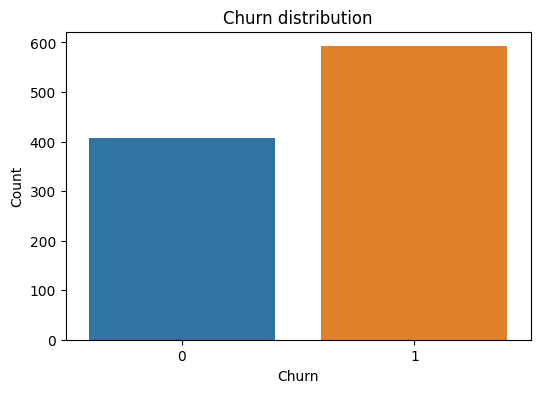

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#visualize
plt.figure(figsize=(6,4))
sns.countplot(x= 'churn', data= data)
plt.title("Churn distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

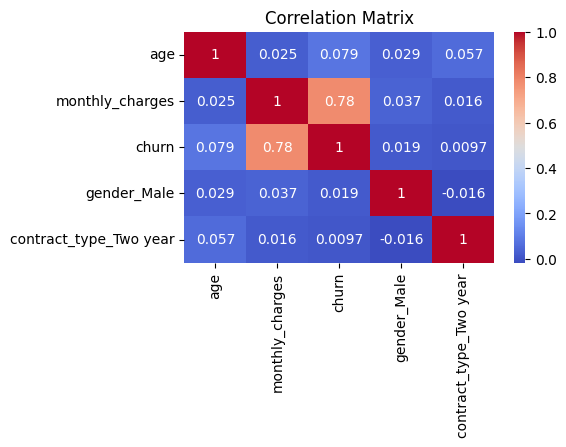

In [ ]:
#Understanding Corelation between features and Churn

correlation_matrix= data.corr()

plt.figure(figsize=(5,3))
sns.heatmap(correlation_matrix, annot= True, cmap ='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
#Creating New features based on the analysis


In [ ]:
#Splitting the data

from sklearn.model_selection import train_test_split

X= data.drop(['churn'], axis = 1)
Y= data['churn']

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size = 0.2, random_state= 42)


#Building the model (Random forest classifier)

from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators= 100, random_state= 42)

#training
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#predicting on test set

Y_pred= rf_classifier.predict(X_test)
X_pred= rf_classifier.predict(X_test)



print(Y_pred)
print(X_pred)

[1 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0
 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1
 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0
 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0
 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1]
[1 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0
 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1
 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0
 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0
 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1]


In [ ]:
#Eval of the model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,  confusion_matrix

accuracy= accuracy_score(Y_test, Y_pred)
precision= precision_score(Y_test, Y_pred)
recall= recall_score(Y_test, Y_pred)
f1= f1_score(Y_test, Y_pred)
conf_mat= confusion_matrix(Y_test, Y_pred)

print("Accuracy", accuracy)
print("Precision score", precision)
print("Recall", recall)
print("F1 Score", f1)
print("Confusion matrix", conf_mat)




Accuracy 0.845
Precision score 0.868421052631579
Recall 0.8608695652173913
F1 Score 0.8646288209606986
Confusion matrix [[70 15]
 [16 99]]


In [ ]:
# A /B testing

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score


#Define different model variants

model_variants = [
                RandomForestClassifier(n_estimators= 100, random_state=42),
                RandomForestClassifier(n_estimators= 200, random_state=42)

                #Can add more models here

]

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size = 0.2, random_state= 42)

   #Running A/B testing and evaluating different model performance

for model in model_variants:

     model.fit(X_train, Y_train)
     y_pred= model.predict(X_test)
     auc_score= roc_auc_score(Y_test, Y_pred)
     print("Model:", model, "AUC score:", auc_score)









Model: RandomForestClassifier(random_state=42) AUC score: 0.8421994884910485
Model: RandomForestClassifier(n_estimators=200, random_state=42) AUC score: 0.8421994884910485
